In [14]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

%matplotlib inline

In [4]:
from gensim.models import KeyedVectors

In [5]:
# Norwegian, Swedish, Danish, Icelandic, Faroese, Finnish, Estonian, Latvian, Lithuanian, Greenlandic
lang_clics_list = [ "nob", "swe", "dan", "isl", "fin", "lav", "lit", "kal"]

lang_wn_list = [ "swe", "dan", "isl", "fin", "est", "lav", "lit", "kal" ]

In [8]:
clics_embeddings = KeyedVectors.load_word2vec_format(os.path.join("../data/language_embeddings/concat+max", "clics_prone_embeddings" ), binary=False)
wn_embeddings = KeyedVectors.load_word2vec_format(os.path.join("../data/language_embeddings/add+avg", "wn_glove_embeddings" ), binary=False)
wn_concept_embeddings = KeyedVectors.load_word2vec_format(os.path.join("../data/language_embeddings/concat+avg", "wn_concept_glove_embeddings" ), binary=False)

In [9]:
wn_vectors = dict()
for l in lang_wn_list:
    wn_vectors[l]=wn_embeddings[l]

In [11]:
wn_concept_vectors = dict()
for l in lang_wn_list:
    wn_concept_vectors[l]=wn_concept_embeddings[l]

In [12]:
clics_vectors = dict()
for l in lang_clics_list:
    clics_vectors[l]=clics_embeddings[l]

In [38]:
import numpy as np
import pandas as pd

In [60]:
wn_concept_vec = np.array(list(wn_concept_vectors.values()))
wn_vec = np.array(list(wn_vectors.values()))
clics_vec = np.array(list(clics_vectors.values()))

In [115]:
wn_embedded = TSNE(n_components=2, perplexity=7).fit_transform(wn_vec)
df_wn  = pd.DataFrame(wn_embedded)
df_wn = df_wn.rename(columns={0:'x',1:'y'})
df_wn = df_wn.assign(label=lang_wn_list)
df_wn["Model"] =["WordNet" for _ in range(len(df_wn))]

In [116]:
wn_concept_embedded = TSNE(n_components=2, perplexity=3).fit_transform(wn_concept_vec)
df_wn_concept  = pd.DataFrame(wn_concept_embedded)
df_wn_concept = df_wn_concept.rename(columns={0:'x',1:'y'})
df_wn_concept = df_wn_concept.assign(label=lang_wn_list)
df_wn_concept["Model"] =["WordNet Concept" for _ in range(len(df_wn_concept))]

In [117]:
clics_embedded= TSNE(n_components=2, perplexity=3).fit_transform(clics_vec)
df_clics  = pd.DataFrame(clics_embedded)
df_clics = df_clics.rename(columns={0:'x',1:'y'})
df_clics = df_clics.assign(label=lang_wn_list)
df_clics["Model"] =["CLICS" for _ in range(len(df_clics))]

In [118]:
df_concat = pd.concat([df_clics, df_wn_concept, df_wn], axis=0)

In [119]:
df_concat.rename(columns={"label":"Language"}, inplace=True)


In [120]:
language_dict={"nob":"Norwegian", "swe":"Swedish","dan": "Danish","isl": "Icelandic", "fin":"Finnish", "est":"Estonian", "lav":"Latvian", 
               "lit":"Lithuanian", "kal":"Greenlandic"}

In [121]:
df_concat["Language"].replace(language_dict,inplace=True)

In [122]:
sns.set(style="whitegrid")
sns.color_palette()


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

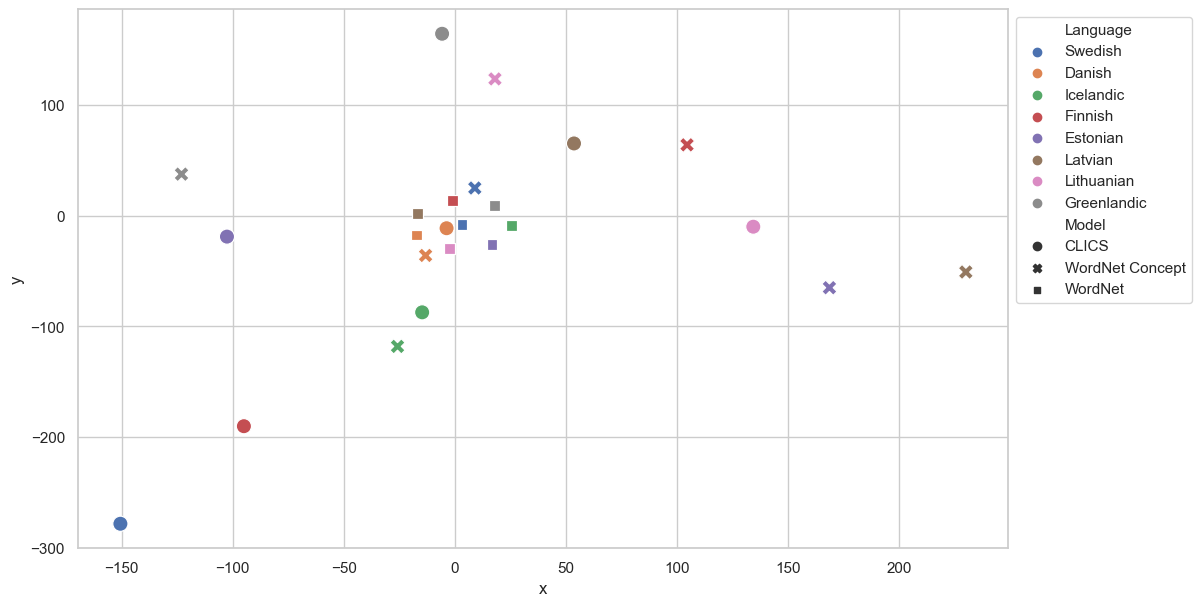

In [123]:
plt.figure(figsize=(12,7))
g = sns.scatterplot(data=df_concat, x="x", y="y", hue="Language", style="Model", s=120)
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("../output/tsne.png")

<Figure size 640x480 with 0 Axes>

In [70]:
df_concat

,x,y,label,model
0,-91.079704,-81.178497,swe,CLICS
1,57.577122,-34.204426,dan,CLICS
2,20.256460,-44.783371,isl,CLICS
3,-39.563702,-71.797943,fin,CLICS
4,44.244835,11.678198,est,CLICS
5,102.040108,-21.645002,lav,CLICS
6,111.744804,-74.482140,lit,CLICS
7,-37.513775,13.417786,kal,CLICS
0,8.770783,-46.111870,swe,WordNet Concept
1,-22.084505,-89.455124,dan,WordNet Concept


In [52]:
import plotly.express as px

fig = px.scatter(
    df_embeddings, x='x', y='y',
    color='label', labels={'color': 'label'},
    hover_data=['label'], title = 'GoEmotions Embedding Visualization')
fig.write_html('first_figure.html', auto_open=True)

In [51]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.write_html('first_figure.html', auto_open=True)